# ML 연습06- Model 튜닝

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data=pd.read_csv("Fvote.csv")

## data 확인

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender_female       211 non-null    int64  
 1   gender_male         211 non-null    int64  
 2   region_Chungcheung  211 non-null    int64  
 3   region_Honam        211 non-null    int64  
 4   region_Others       211 non-null    int64  
 5   region_Sudo         211 non-null    int64  
 6   region_Youngnam     211 non-null    int64  
 7   edu                 211 non-null    int64  
 8   income              211 non-null    int64  
 9   age                 211 non-null    int64  
 10  score_gov           211 non-null    int64  
 11  score_progress      211 non-null    int64  
 12  score_intention     211 non-null    float64
 13  vote                211 non-null    int64  
 14  parties             211 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 24.9 KB


In [2]:
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


## test set 나누기

In [10]:
from sklearn.model_selection import train_test_split

In [7]:
x=data[data.columns[0:13]]
y=data[['vote']]

In [8]:
x

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,1,0,0,0,0,1,1,4,4,3,3,1.8
207,0,1,0,0,0,1,0,2,1,2,3,4,2.6
208,0,1,1,0,0,0,0,2,1,2,3,3,2.6
209,0,1,0,0,0,1,0,2,3,4,3,2,4.0


In [9]:
y

,vote
0,1
1,0
2,1
3,1
4,1
...,...
206,1
207,1
208,1
209,1


In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y,stratify=y,random_state=42)

## Grid Search

### hyper parameter 지정

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid={"C":[0.001,0.01,0.1,1,10,100]}

### LogisticRegression 활용

In [14]:
# 교차검증 : cv=5 
# 정확도 표시 : return_train_score = True
from sklearn.linear_model import LogisticRegression
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5,return_train_score=True)
# 파라미터 찾기
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

### 정확도 확인

In [15]:
print("Best Parameter : {}".format(grid_search.best_params_))
print("Best Cross-validity Score : {:.3f}".format(grid_search.best_score_))

Best Parameter : {'C': 10}
Best Cross-validity Score : 0.727


In [16]:
print('Test set Score : {:.3f}'.format(grid_search.score(x_test,y_test)))

Test set Score : 0.679


### 하이퍼 파라미터 확인

In [17]:
result_grid=pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006575,0.006678,0.000995,0.000002,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.003390,0.000485,0.000605,0.000494,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.005296,0.000884,0.000601,0.000491,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.730159,0.738095,0.738095,0.740157,0.708661,0.731034,0.011698
3,0.006378,0.000494,0.000809,0.000405,1,{'C': 1},0.71875,0.68750,0.81250,0.580645,...,0.721169,0.085441,4,0.738095,0.785714,0.730159,0.763780,0.724409,0.748431,0.022993
4,0.009187,0.000955,0.000792,0.000396,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.010111,0.000665,0.000996,0.000021,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


### 하이퍼파라미터 값 별로 훈련/테스트 데이터 정확도 확인

In [18]:
import matplotlib.pyplot as plt

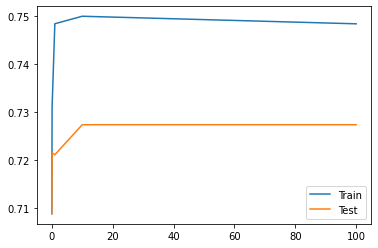

In [21]:
plt.plot(result_grid['param_C'],result_grid['mean_train_score'],label="Train")
plt.plot(result_grid['param_C'],result_grid['mean_test_score'],label="Test")
plt.legend()